In [7]:
#  Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)
#c is to control whether we should initialize the variables
c=0
learning_rate=0.001
epochs=10000
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int64)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int64)
#tf.data.Dataset.from_tensor_slices
  
  


Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [19]:
train_data=train_data.reshape(55000,784,1)
dataset=tf.data.Dataset.from_tensor_slices(train_data)
dataset=dataset.batch(batch_size=5)
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
#print(train_data.shape)
batch_size=5
train_data[0:5].shape
#print(train_data.shape)
#print(train_labels[0:5].shape)
print(type(train_labels[0]))
#print((train_labels.shape))
eval_data=eval_data.reshape(10000,784,1)
#print(eval_data.shape)

<class 'numpy.int64'>


Text(0.5,1,'(Label: 7)')

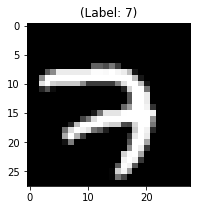

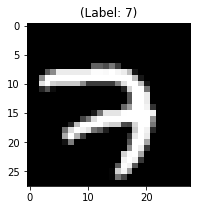

In [20]:
plt.figure(figsize=[3,3])

# Display the first image in training data
#plt.subplot(121)

plt.imshow(train_data[0].reshape(28,28), cmap='gray')
plt.title("(Label: " + str(train_labels[0]) + ")")
plt.figure(figsize=[3,3])

# Display the first image in training data
#plt.subplot(121)

plt.imshow(train_data[0].reshape(28,28), cmap='gray')
plt.title("(Label: " + str(train_labels[0]) + ")")


In [21]:
print(dataset)

<BatchDataset shapes: (?, 784, 1), types: tf.float32>


In [22]:

def cnn_model_fn(inp):
    #using value -1, can make us batch_size more flexible!
    input_layer = tf.reshape(inp, [-1, 28, 28 ,1])
    #convolutional
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu,
    #name='conv1'
    )
    #maxpooling1
    pool1=tf.layers.max_pooling2d(
    inputs=conv1,
    pool_size=[2,2],
    strides=2,
    padding='same',
    #name='MaxPool1'
    )
    #conv2
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu,
    #name='conv2'
    )
    #maxpooling2
    pool2=tf.layers.max_pooling2d(
    inputs=conv2,
    pool_size=[2,2],
    strides=2,
    padding='same',
    #name='MaxPool1'
    )
    #faltten
    #pool2_flat = tf.reshape(pool2, [batch_size, 7 * 7 * 64])
  
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense1=tf.layers.dense(
    inputs=pool2_flat,
    units=1028,
    activation=tf.nn.relu)
    
    drop_out=tf.layers.dropout(
    inputs=pool2_flat,
    rate=0.4)
    #output layer
    #if doesn't set activation, then it's use a linear function
    logits = tf.layers.dense(inputs=drop_out, units=10)
    
        
    return logits


In [23]:
#create a place holder to hold cnn_model_fn("""inp""")
#place_holder 的第一項設定成None 就可以使你的輸入很flexible!!!(好方便啊!)
x = tf.placeholder(tf.float32, shape=(None, 784,1))
y=tf.placeholder(tf.int64, shape=(None))
logits=cnn_model_fn( x)
#tf.nn.sparse_softmax_cross_entropy_with_logits logit一定要pass float32 or float64的data進去 而lables只能pass int32 or int64
loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits= logits))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
pred=tf.arg_max(logits,1)
#tf.cast可以改變tensor的data type
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(logits,1),y),tf.float32))

##########################################################################################################
#明天從這裡開始
#
##########################################################################################################
init = tf.global_variables_initializer()
print(train_data[0:5].shape)

(5, 784, 1)


training_loss= 2.3067765
test_loss= 2.3182268


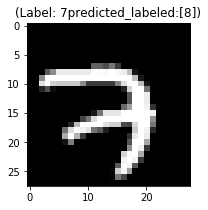

training_loss= 2.3286147
test_loss= 2.2940078


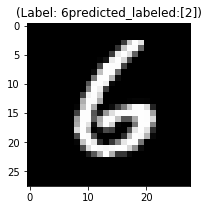

training_loss= 2.2714727
test_loss= nan


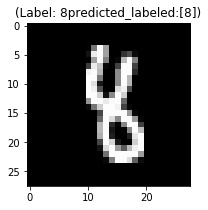

training_loss= 2.3755238
test_loss= nan


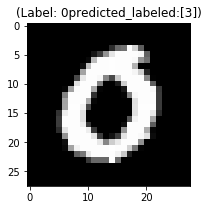

training_loss= 2.2487671
test_loss= nan


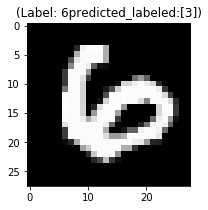

training_loss= 2.337973
test_loss= nan


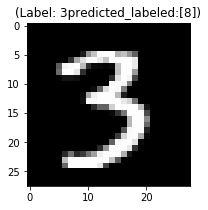

training_loss= 2.3107927
test_loss= nan


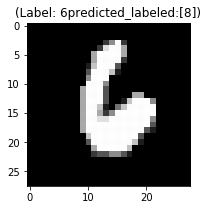

training_loss= 2.4095945
test_loss= nan


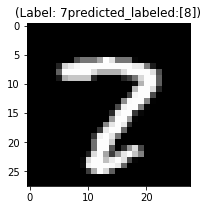

training_loss= 2.269841
test_loss= nan


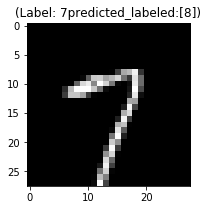

training_loss= 2.3389626
test_loss= nan


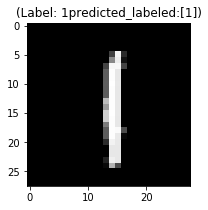

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    #iterator = dataset.make_one_shot_iterator()
    #next_element = iterator.get_next()
    plt.show()
    for i in range(epochs):
        #print(i)
        #temp_element=sess.run(next_element)
        #tensor flow 是在建立graph，
        #print(train_data[5*i:5*i+5].shape)
        #feed_in=train_data[0:5]
        #print(feed_in.shape)
        #temp=sess.run(logits, feed_dict={x:feed_in})
        #temp=sess.run(optimizer, feed_dict={x:train_data[5*i:5*i+5],y:train_labels[5*i:5*i+5]})
        #temp=sess.run(optimizer, feed_dict={x:next_element,y:train_labels[5*i:5*i+5]})
        #print(temp)
        gg=sess.run(next_element)
        #if i%100==1:
            #print("tf shape",type(gg))
            #print(train_data[5*i:5*i+5].shape)
        if i%1000==0:
            print('training_loss=',sess.run(loss, feed_dict={x:train_data[5*i:5*i+5],y:train_labels[5*i:5*i+5]}))
            print('test_loss=',sess.run(loss, feed_dict={x:eval_data[5*i:5*i+5],y:eval_labels[5*i:5*i+5]}))
            #print(sess.run(accuracy),feed_dict={x:train_data[5*i:5*i+5]})
        #Show image
            plt.figure(figsize=[3,3])
            plt.imshow(train_data[i].reshape(28,28), cmap='gray')
            #temp=train_data[i].reshape()
            #print(train_data[i].shape)
            plt.title("(Label: " + str(train_labels[i]) + "predicted_labeled:"+str(sess.run(pred,feed_dict={x:train_data[i:i+1]}))+")")
            plt.show()

In [ ]:
with tf.Session() as sess:
    for i in range(5):
        